## ABM Covid-19 mitigation policies tutorial

In [31]:
from mhm.model import Model
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define some parameters for the agents:

In [8]:
age_group = (
    ['_1', '_2', '_3', '_4'],
    [.25, .23, .31, .21]
)

gender = (
    [0, 1],
    [.5, .5]
)

education = (
    ['Low', 'Medium', 'High'],
    [.11, .25, .64]
)

employed = (
    ['No, other', 'No, seeking employment', 'Yes'],
    [.76, .155, .085]
)

partnership_status = (
    ['Single', 'Married', 'Live-in partner', 'In relationship, no cohabitation', 'Other'],
    [.2, .41, .29, .09, .01]
)

pre_existing_depression = (
    [0, 1], # false, true
    [.8, .2]
)

pre_existing_burnout = (
    [0, 1], # false, true
    [.27, .73]
)

pre_existing_addiction = (
    [0, 1], # false, true
    [.95, .05]
)

pre_existing_chronic_fatigue = (
    [0, 1], # false, true
    [.95, .05]
)

parenthood = (
    [0, 1], # no child, single parent, complete parents
    [.93, .07]
)

living_with_child = (
    [0, 1],
    [.42, .58]
)

single_parent = (
    [0, 1],
    [.95, .05]
)

housing_difficulties = (
    ['No', 'Some', 'Many'],
    [0.79, 0.18, 0.03]
)

finance_difficulties = (
    ['No', 'Some', 'Many'],
    [.75, .13, .12]
)

pre_existing_health_issues = (
    ['No', 'Some', 'Many'],
    [.65, .20, .15]
)

partner_difficulties = (
    ['No', 'Some', 'Many', 'Other'],
    [.67, .18, .05, .1]
)

job_type = (
    ['white_collar', 'medical_professional', 'key_worker', 'other'],
    [.2, .2, .2, .4]
)

area = (
    ['urban', 'rural'],
    [.7, .3]
)

ses = (
    ['low', 'medium', 'high'],
    [.15, .55, .3]
)

### Initialise the model

In [9]:
model = Model()

### Generate population with fixed size

In [50]:
size = 100
model.setup(size,
        gender=gender,
        age_group=age_group,
        education=education,
        employed=employed,
        partnership_status=partnership_status,
        pre_existing_depression=pre_existing_depression,
        pre_existing_burnout=pre_existing_burnout,
        pre_existing_addiction=pre_existing_addiction,
        pre_existing_chronic_fatigue=pre_existing_chronic_fatigue,
        parenthood=parenthood,
        living_with_child=living_with_child,
        single_parent=single_parent,
        housing_difficulties=housing_difficulties,
        finance_difficulties=finance_difficulties,
        pre_existing_health_issues=pre_existing_health_issues,
        partner_difficulties=partner_difficulties,
        job_type=job_type,
        area=area,
        ses=ses)

### Run the model

This will output "simulation_results.csv". You can define the type of lockdown (among "hard", "easy", "medium", "no_lockdown") for each number of steps.

In [51]:
lockdowns = ['absent', 'easy', 'medium', 'hard']
steps = 10
# at the moment we are randomising it but ideally one should give the sequence of lockdowns for each step
repeated_entries = lockdowns * (steps // len(lockdowns)) + lockdowns[:steps % len(lockdowns)]
randomised_lockdowns = random.sample(repeated_entries, len(repeated_entries))

In [12]:
model.run(steps=steps, lockdown=randomised_lockdowns, out_path="simulation_results.csv")

In [15]:
data = pd.read_csv('simulation_results.csv')

### Group by step_id and compute the average mh and n_contacts

In [19]:
display(data.head())

,step_id,agent_id,lockdown,mh,n_contacts
0,0,0,absent,0.9,3.0
1,0,1,absent,5.0,10.5
2,0,2,absent,3.6,4.5
3,0,3,absent,2.8,2.0
4,0,4,absent,2.3,5.5


In [26]:
grouped_data = data.groupby('lockdown').mean()[['mh', 'n_contacts']]

In [33]:
grouped_data = data.groupby(['step_id', 'lockdown']).mean().reset_index()
display(grouped_data.head())

,step_id,lockdown,agent_id,mh,n_contacts
0,0,absent,49.5,5.515,5.265
1,1,hard,49.5,4.499,3.800
2,2,absent,49.5,6.211,5.675
3,3,medium,49.5,5.059,4.025
4,4,medium,49.5,5.076,4.615


### Create a scatter plot of the average mh and n_contacts for each step coloured by lockdown type

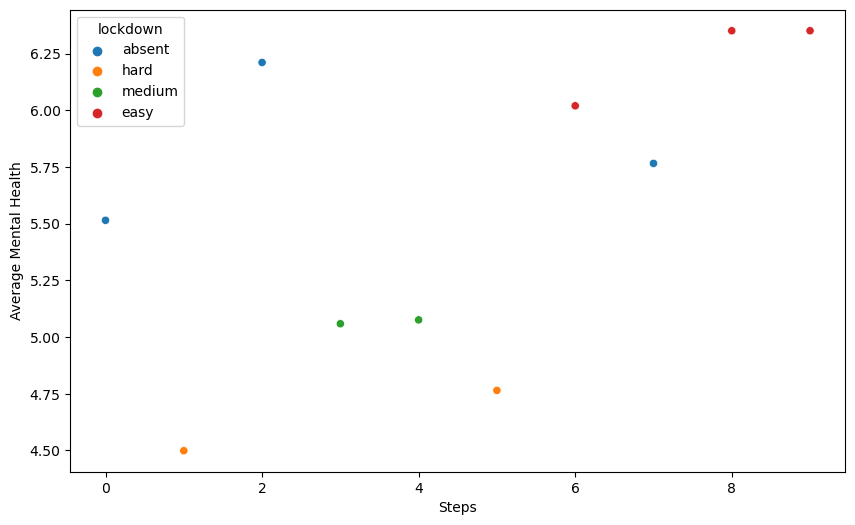

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='step_id', y='mh', hue='lockdown')
plt.xlabel('Steps')
plt.ylabel('Average Mental Health')
plt.show()

In [36]:
data.groupby(['lockdown']).mean().reset_index()

,lockdown,step_id,agent_id,mh,n_contacts
0,absent,3.000000,49.5,5.830667,5.365000
1,easy,7.666667,49.5,6.240667,5.741667
2,hard,3.000000,49.5,4.632000,3.970000
3,medium,3.500000,49.5,5.067500,4.320000


#### Average mental health by lockdown type

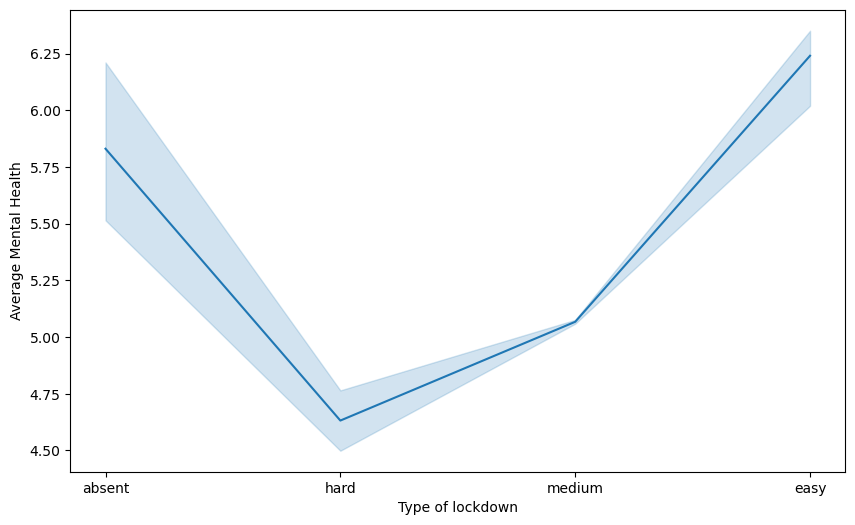

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x="lockdown", y="mh")
plt.xlabel('Type of lockdown')
plt.ylabel('Average Mental Health')
plt.show()